In [1]:
import numpy as np
import pandas as pd
import DNN_model as dnn 

In [2]:
# Set up hyper parameters 
c = 3
layer_dims = [10, c] 
learning_rate = 0.0005
keep_prob = 1.0
num_epochs = 300
minibatch_size = 64
print_summary = True
isBinary = c <= 2 
hyperparams = dnn.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)

In [3]:
# Generate data
m = 1000
n_x = 10
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(c, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test


----------------------

3-class classification neural network with hyperparameters:
layer_dims: [10, 3] keep_prob: 1.0 learning_rate: 0.0005 num_epochs: 300 minibatch_size: 64
Training underway...
Done training!


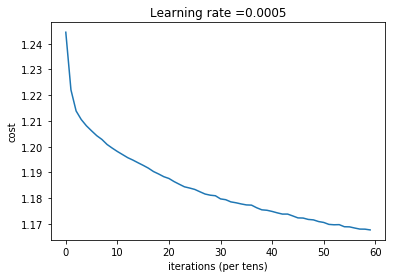

train_accuracy : 0.434286
test_accuracy : 0.373333
precision : 0.236666666667
recall : 0.236666666667
f1score : 0.236666666667


In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
train_orig = df.sample(frac=0.70)
x_train = train_orig.drop(label, axis = 1).T.values 
y_train = dnn.one_hot_matrix(train_orig[label], c, axis = 0)

test_orig = df.drop(train_orig.index)
x_test = test_orig.drop(label, axis = 1).T.values  
y_test = dnn.one_hot_matrix(test_orig[label], c, axis = 0)

model = dnn.train_with_hyperparameter_bundle(x_train, y_train, x_test, y_test, hyperparams, print_summary=print_summary)
parameters = model[dnn.KEY_PARAMETERS]
prediction = dnn.predict(x_train, parameters, isBinary)


----------------------

3-class classification neural network with hyperparameters:
layer_dims: [3] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


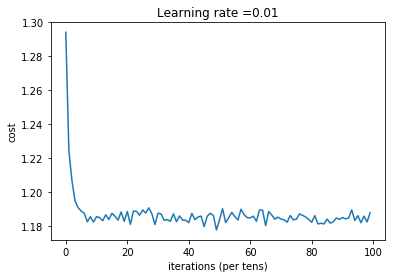

train_accuracy : 0.407796
test_accuracy : 0.363363
precision : 0.201201201201
recall : 0.201201201201
f1score : 0.201201201201

----------------------

3-class classification neural network with hyperparameters:
layer_dims: [3] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


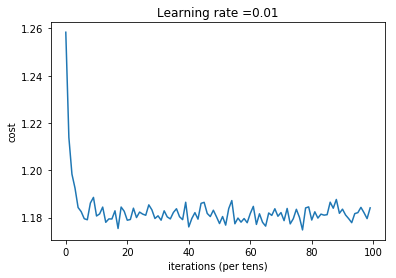

train_accuracy : 0.427286
test_accuracy : 0.321321
precision : 0.264264264264
recall : 0.264264264264
f1score : 0.264264264264

----------------------

3-class classification neural network with hyperparameters:
layer_dims: [3] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


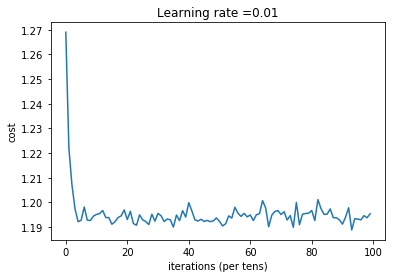

train_accuracy : 0.399399
test_accuracy : 0.311377
precision : 0.266467065868
recall : 0.266467065868
f1score : 0.266467065868

----------------------

3-class classification neural network with hyperparameters:
layer_dims: [5, 3] keep_prob: 0.75 learning_rate: 0.001 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


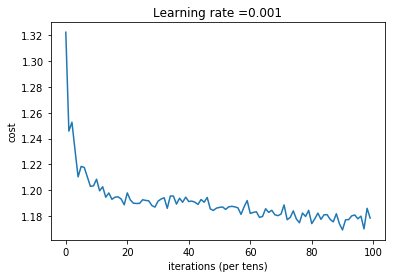

train_accuracy : 0.428786
test_accuracy : 0.336336
precision : 0.306306306306
recall : 0.306306306306
f1score : 0.306306306306

----------------------

3-class classification neural network with hyperparameters:
layer_dims: [5, 3] keep_prob: 0.75 learning_rate: 0.001 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


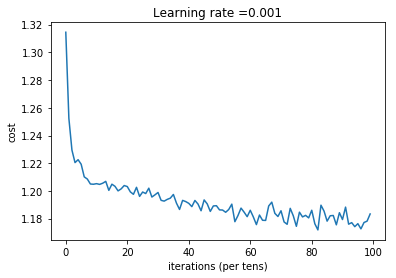

train_accuracy : 0.424288
test_accuracy : 0.366366
precision : 0.174174174174
recall : 0.174174174174
f1score : 0.174174174174

----------------------

3-class classification neural network with hyperparameters:
layer_dims: [5, 3] keep_prob: 0.75 learning_rate: 0.001 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


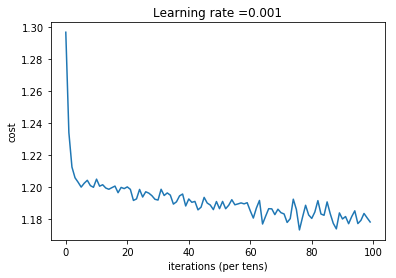

train_accuracy : 0.418919
test_accuracy : 0.323353
precision : 0.12874251497
recall : 0.12874251497
f1score : 0.12874251497
avg_accuracy1 0.332020640373
avg_accuracy2 0.342018663883


In [5]:
# Example of using kfold to determine best hyper parameters
hyperparams1 = dnn.create_hyperparameter_bundle(layer_dims = [c], learning_rate = 0.01, num_epochs = 500, keep_prob = 1.0)
hyperparams2 = dnn.create_hyperparameter_bundle(layer_dims = [5,c], learning_rate = 0.001, num_epochs = 500, keep_prob = 0.75)

avg_accuracy1 = dnn.kfold(df, label, hyperparams1, k = 3.0, print_summary)
avg_accuracy2 = dnn.kfold(df, label, hyperparams2, k = 3.0, print_summary)

print "avg_accuracy1 " + str(avg_accuracy1)
print "avg_accuracy2 " + str(avg_accuracy2)